Условие - https://drive.google.com/drive/u/0/folders/1QnpYNh_N0sABgY7Cvn_1WbFtmk4_IP5y


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import pandas as pd
from scipy.special import factorial
import warnings


# Задача №2


Инициализация, BootstrepedDistribution - класс для вычисления бутстрепа.
Генерим случайную величину из $R[0,1]$ (random_param)


In [7]:
class BootstrepedDistribution:
    def __init__(self, np_distribution_class, bootstrep_size, *args, **kwargs):
        self._np_distribution_class = np_distribution_class
        self._np_distribution = np_distribution_class(*args, **kwargs)
        self._distrib_params = args
        self._bootstrep_size = bootstrep_size

        self._sample = self._np_distribution.rvs(size=RANDVAR_COUNT)

    def get_bootstrep_variance(self, bootstrep_func, bootstrep_estimate_func, estimator_func):
        bootstrap_variance_estimators = np.zeros(RANDVAR_COUNT)
        for n in range(RANDVAR_COUNT):
            effective_estimator = estimator_func(self._sample[:n + 1])
            bootstrap_variance_estimators[n] = self._s2(
                bootstrep_func(self, n + 1, effective_estimator, bootstrep_estimate_func))

        return bootstrap_variance_estimators

    def _s2(self, bootstrap_estimators):
        return np.mean(bootstrap_estimators ** 2) - np.mean(bootstrap_estimators) ** 2

RANDVAR_COUNT = 1000
m = 50
random_param = sps.uniform(0, 1).rvs(1)[0]
BOOTSTREP_SIZE = 500


# sps.binom
Вычислим эффективную оценку биномиального распределения $\frac{\overline{X}}{m}$ и бутстрепную оценку её дисперсии.

get_param_bootstrep() вычисляет бутстрепную оценку. Для каждого распределения она будет немного разной.


In [8]:

def get_param_bootstrep(self, n, effective_estimator, estimator_func):  #
    bootstrap_estimators = np.zeros(self._bootstrep_size)
    bootstrap_param_samples = self._np_distribution_class(self._distrib_params[0], effective_estimator) \
        .rvs((self._bootstrep_size, n))

    for k in range(self._bootstrep_size):
        bootstrap_estimators[k] = estimator_func(bootstrap_param_samples[k]) / m

    return bootstrap_estimators

d = BootstrepedDistribution(sps.binom, BOOTSTREP_SIZE, m, random_param)
meanm = lambda array: np.mean(array) / m
Xmean = d.get_bootstrep_variance(get_param_bootstrep, meanm, meanm)


Вычислим несмещённую оценку биномиального распределения $\frac{X_1}{m}$ и бутстрепную оценку её дисперсии.


In [9]:
X1 = d.get_bootstrep_variance(get_param_bootstrep, lambda array: array[0],
                              lambda array: np.min(array) / m)


Нарисуем ещё нижнюю оценку дисперсии из неравенства Рао-Крамера для биномиального распределения $\frac{1}{I_X(p)} = \frac{p (1 - p)}{n m}$
 
Сравним что же получилось!


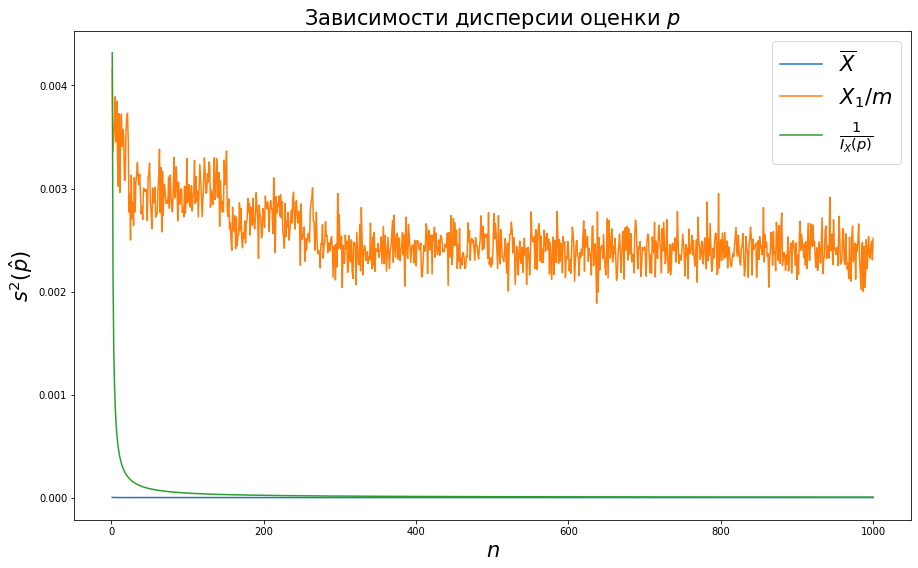

In [10]:
start = 0
plt.figure(figsize=(15, 9))
plt.plot(range(start + 1, RANDVAR_COUNT + 1), Xmean[start:], label=r"$\overline{X}$")
plt.plot(range(start + 1, RANDVAR_COUNT + 1), X1[start:], label=r"$X_1/m$")
plt.plot(range(start + 1, RANDVAR_COUNT + 1), [random_param * (1 - random_param) / n / m for n in range(start + 1, RANDVAR_COUNT + 1)],
         label=r"$\frac{1}{I_X(p)}$")

plt.title(r"Зависимости дисперсии оценки $p$", fontsize=21)
plt.xlabel(r"$n$", fontsize=21)
plt.ylabel(r"$s^2(\hat{p})$", fontsize=21)
plt.legend(fontsize=21)
plt.show()


По графику видно, что эффективная оценка $\frac{\overline{X}}{m}$ почти совпадает с оценкой из неравенства Рао-Крамера,
что и означает, что она эффективная :) 

А вот смещённая оценка $\frac{X_1}{m}$ оказалась выше на графике, что и подтверждает теорему Рао-Крамера. 


# sps.norm
$\sigma = 2.1$, другой параметр возьмём из $R[0,1]$

Вычислим эффективную оценку нормального распределения $\overline{X}$ и бутстрепную оценку её дисперсии.

get_param_bootstrep() вычисляет бутстрепную оценку. Для каждого распределения она будет немного разной.


In [ ]:

def get_param_bootstrep(self, n, effective_estimator, estimator_func):  #
    bootstrap_estimators = np.zeros(self._bootstrep_size)
    bootstrap_param_samples = self._np_distribution_class(effective_estimator, self._distrib_params[1]) \
        .rvs((self._bootstrep_size, n))

    for k in range(self._bootstrep_size):
        bootstrap_estimators[k] = estimator_func(bootstrap_param_samples[k])

    return bootstrap_estimators

sigma = 2.1
d = BootstrepedDistribution(sps.norm, BOOTSTREP_SIZE, random_param, sigma ** 0.5)
Xmean = d.get_bootstrep_variance(get_param_bootstrep, np.mean, np.mean)


Вычислим несмещённую оценку нормального распределения $median(a)$ и бутстрепную оценку её дисперсии.


In [ ]:
Xmedian = d.get_bootstrep_variance(get_param_bootstrep, np.median, np.median)


Нарисуем ещё нижнюю оценку дисперсии из неравенства Рао-Крамера для нормального распределения $\frac{1}{I_X(a)} = \frac{\sigma^2}{n}$
 
Сравним что же получилось!


In [ ]:
plt.figure(figsize=(15, 9))
plt.plot(range(1, RANDVAR_COUNT + 1), Xmean, label=r"$\overline{X}$")
plt.plot(range(1, RANDVAR_COUNT + 1), Xmedian, label=r"$median(a)$")
plt.plot(range(1, RANDVAR_COUNT + 1), [sigma / n for n in range(1, RANDVAR_COUNT + 1)], label=r"$\frac{1}{I_X(a)}$")

plt.title(r"График зависимости дисперсии оценок параметра $a$ от $n$", fontsize=21)
plt.xlabel(r"$n$", fontsize=21)
plt.ylabel(r"$s^2(\hat{a})$", fontsize=21)
plt.ylim(0, 1)
plt.legend(fontsize=21)

plt.show()


По графику видно, что эффективная оценка $\overline{X}$ почти совпадает с оценкой из неравенства Рао-Крамера,
что и означает, что она эффективная :) 

А вот смещённая оценка $median(a)$ оказалась выше на графике, что и подтверждает теорему Рао-Крамера. 


# sps.expon
Параметр возьмём из $R[0,1]$
В рамках курса мы доказывали, что для экспоненциального распределения эффективные оценки есть только для $\tau(\theta) = \frac{a}{\theta} + b$
Давайте возьмём в качестве оцениваемого параметра $\frac{1}{\theta}$.

Вычислим эффективную оценку экспоненциального распределения $\overline{X}$ и бутстрепную оценку её дисперсии.

get_param_bootstrep() вычисляет бутстрепную оценку. Для каждого распределения она немного разная.


In [ ]:

def get_param_bootstrep(self, n, effective_estimator, estimator_func):
    bootstrap_estimators = np.zeros(self._bootstrep_size)
    bootstrap_param_samples = self._np_distribution_class(scale=effective_estimator) \
        .rvs((self._bootstrep_size, n))

    for k in range(self._bootstrep_size):
        bootstrap_estimators[k] = estimator_func(bootstrap_param_samples[k])

    return bootstrap_estimators

d = BootstrepedDistribution(sps.expon, BOOTSTREP_SIZE, random_param, scale=1/random_param)
Xmean = d.get_bootstrep_variance(get_param_bootstrep, np.mean, np.mean)


Вычислим оценку экспоненциального распределения $\frac{n \overline{X}}{n - 1}$ и бутстрепную оценку её дисперсии.


In [ ]:
estimator = lambda array : ((RANDVAR_COUNT-1)/RANDVAR_COUNT) * np.mean(array)
X = d.get_bootstrep_variance(get_param_bootstrep, estimator, estimator)


Нарисуем ещё нижнюю оценку дисперсии из неравенства Рао-Крамера для экспоненциального распределения $\frac{(\tau'(\theta))^2}{I_X(a)} = \frac{1}{n \theta^2}$
 
Сравним что же получилось!


In [ ]:

plt.figure(figsize=(15, 9))
plt.plot(range(1, RANDVAR_COUNT + 1), Xmean, label=r"$\overline{X}$")
plt.plot(range(1, RANDVAR_COUNT + 1), X, label=r"$\frac{n \overline{X}}{n - 1}$")
plt.plot(range(1, RANDVAR_COUNT + 1), [1 / (random_param ** 2) / n for n in range(1, RANDVAR_COUNT + 1)], 
         label=r"$\frac{(\tau'(\theta))^2}{I_X(\theta)}$")

plt.title(r"""Зависимость дисперсии оценки $\frac{1}{\theta}$""", fontsize=21)
plt.xlabel(r"$n$", fontsize=21)
plt.ylabel(r"$s^2(\theta^*(X))$", fontsize=21)
plt.ylim(0, 1)
plt.legend(fontsize=21)

plt.show()


По графику видно, что эффективная оценка $\overline{X}$ параметра $\frac{1}{\theta}$ почти совпадает с оценкой из неравенства Рао-Крамера,
что и означает, что она эффективная :) 

Мы можем видеть, что оценка дисперсии $\frac{n \overline{X}}{n - 1}$ тоже хорошо апроксимирует 
нижнюю оценку дисперсии из неравенства, однако она не является несмещённой, то есть для неё не всегда работает
неравенство Рао-Крамера.


# Итог

Действительно, неравенство Рао-Крамера работает, а эффективная оценка - случай равенства в нём. А вот не несмещённая
оценка дисперсии может быть и ниже нижней оценки дисперсии, ибо неравенство Рао-Крамера выполняется только для несмещённых оценок.


# Задача №3


Инициализация, BootstrepedDistribution - класс для вычисления бутстрепа.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import pandas as pd
from scipy.special import factorial
import warnings

class BootstrepedDistribution:
    def __init__(self, np_distribution_class, bootstrep_size, sample_size, thetas, *args, **kwargs):
        self._sps_distribution_class = np_distribution_class

        try:
            self._sps_distribution = np_distribution_class(*args)
        except Exception:
            self._sps_distribution = None

        self._thetas = thetas
        self._distrib_params = args
        self._bootstrep_size = bootstrep_size
        self._sample_size = sample_size

    def get_param_bootstrep(self, n, estimator, estimator_func):  #
        bootstrap_estimators = np.zeros(self._bootstrep_size)
        bootstrap_param_samples = self._sps_distribution_class(estimator) \
            .rvs((self._bootstrep_size, n))

        for k in range(self._bootstrep_size):
            bootstrap_estimators[k] = estimator_func(bootstrap_param_samples[k])

        return bootstrap_estimators

    def get_bootstrep_variance(self, bootstrep_func, bootstrep_estimate_func, estimator_func):
        bootstrap_variance_estimators = np.zeros(len(self._thetas))
        for i, theta in enumerate(self._thetas):
            sample = self._sps_distribution_class(theta).rvs(size=self._sample_size)
            effective_estimator = estimator_func(sample)
            bootstrap_variance_estimators[i] = self._s2(
                bootstrep_func(self, self._sample_size, effective_estimator, bootstrep_estimate_func))

        return bootstrap_variance_estimators

    def _s2(self, bootstrap_estimators):
        return np.mean(bootstrap_estimators ** 2) - np.mean(bootstrap_estimators) ** 2

    def get_estimators(self, sample, estimators_func):
        params = [estimators_func(sample[:n]) for n in range(1, sample.shape[0])]
        params.append(estimators_func(sample))

        return params

RANDVAR_COUNT = 1000
BOOTSTREP_SIZE = 500


Создадим сетку и вычислим нижнюю оценку дисперисии - $\frac{1}{I_X(\theta)}$ в неравенстве Рао-Крамера, которая у распределения Бернулли $\frac{\theta (1 - \theta)}{N}$


In [ ]:

thetas = np.linspace(0, 1, 101)
rao_kramers_estimation = thetas * (1 - thetas) / RANDVAR_COUNT

plt.figure(figsize=(12, 8))
plt.plot(thetas, rao_kramers_estimation)
plt.title(r"""Зависимость нижней оценки 
          дисперсии несмещенной оценки от $\theta$""", fontsize=21)
plt.xlabel(r"$\theta$", fontsize=21)
plt.ylabel(r"$\frac{1}{I_X(\theta)}$", fontsize=21)
plt.show()


По графику можно судить, что нижняя оценка достигает максимума при $\theta=0.5$ и она симметрична относительно прямой $\theta=0.5$. 


Построим бутстрепную оценку дисперсии эффективной оценки, в данном случае это mean. Т.е. сначала считаем эффективную оценку для сетки, а потом её бутстрепную оценку.
Размер выборки = 1000, а количество бутстрепных выборок = 500 


In [ ]:
distrib = BootstrepedDistribution(sps.bernoulli, BOOTSTREP_SIZE, RANDVAR_COUNT, thetas)
variance_estimation = distrib.get_bootstrep_variance(BootstrepedDistribution.get_param_bootstrep, np.mean, np.mean)

plt.figure(figsize=(12, 8))
plt.plot(thetas, variance_estimation)
plt.title(r"""Зависимость бутстрепной оценки дисперсии эффективной оценки от $\theta$""", fontsize=21)
plt.xlabel(r"$\theta$", fontsize=21)
plt.ylabel(r"$s^2(\hat{\theta})$", fontsize=21)

plt.show()


Сравним данные графики.


In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(thetas, rao_kramers_estimation)
plt.plot(thetas, variance_estimation)

plt.title(r"""Сравнение бутстрепной оценки дисперсии эффективной оценки и нижней оценки из Рао-Крамера""", fontsize=21)
plt.xlabel(r"$\theta$", fontsize=21)
plt.ylabel(r"$D(X)$", fontsize=21)

plt.show()


Как мы можем увидеть, бутстрепная оценка дисперсии эффективной оценки хорошо апроксимирует 
нижнюю оценку дисперсии из неравенства Рао-Крамера. Поэтому вывод - бутстрепный метод хорош для приближения дисперсии эффективных оценок, как мы видим его почти нельзя улучшить.
